# Media Pipe explained

In [122]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cv2
import mediapipe as mp


In [123]:
def print_elements(x, in_row = 5):
    names = [e.name for e in x]
    names_length = len(names)
    for i in range(names_length // in_row):
        print(names[(i * in_row):min((i + 1) * in_row, names_length)])

def print_connections(connections, points, in_row = 3):
    points = {e.value:e.name for e in points}
    connections_as_string = [(points.get(i), points.get(j)) for (i, j) in connections]
    connections_length = len(connections_as_string)
    for i in range(connections_length // in_row):
        print(connections_as_string[(i * in_row):min((i + 1) * in_row, connections_length)])

Models preparation:

In [124]:
mp_hands = mp.solutions.hands
mp_face = mp.solutions.face_detection
mp_pose = mp.solutions.pose
mp_facemesh = mp.solutions.face_mesh
mp_holistic = mp.solutions.holistic

## Hand and Pose
Point names to be detected

In [125]:
print('Hands parts')
print(type(mp_hands.HandLandmark))
print_elements(mp_hands.HandLandmark)

print('\nFace parts')
print(type(mp_face.FaceKeyPoint))
print_elements(mp_face.FaceKeyPoint)

print('\nPose parts')
print(type(mp_pose.PoseLandmark))
print_elements(mp_pose.PoseLandmark)



Hands parts
<class 'enum.EnumMeta'>
['WRIST', 'THUMB_CMC', 'THUMB_MCP', 'THUMB_IP', 'THUMB_TIP']
['INDEX_FINGER_MCP', 'INDEX_FINGER_PIP', 'INDEX_FINGER_DIP', 'INDEX_FINGER_TIP', 'MIDDLE_FINGER_MCP']
['MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP', 'RING_FINGER_MCP', 'RING_FINGER_PIP']
['RING_FINGER_DIP', 'RING_FINGER_TIP', 'PINKY_MCP', 'PINKY_PIP', 'PINKY_DIP']

Face parts
<class 'enum.EnumMeta'>
['RIGHT_EYE', 'LEFT_EYE', 'NOSE_TIP', 'MOUTH_CENTER', 'RIGHT_EAR_TRAGION']

Pose parts
<class 'enum.EnumMeta'>
['NOSE', 'LEFT_EYE_INNER', 'LEFT_EYE', 'LEFT_EYE_OUTER', 'RIGHT_EYE_INNER']
['RIGHT_EYE', 'RIGHT_EYE_OUTER', 'LEFT_EAR', 'RIGHT_EAR', 'MOUTH_LEFT']
['MOUTH_RIGHT', 'LEFT_SHOULDER', 'RIGHT_SHOULDER', 'LEFT_ELBOW', 'RIGHT_ELBOW']
['LEFT_WRIST', 'RIGHT_WRIST', 'LEFT_PINKY', 'RIGHT_PINKY', 'LEFT_INDEX']
['RIGHT_INDEX', 'LEFT_THUMB', 'RIGHT_THUMB', 'LEFT_HIP', 'RIGHT_HIP']
['LEFT_KNEE', 'RIGHT_KNEE', 'LEFT_ANKLE', 'RIGHT_ANKLE', 'LEFT_HEEL']


Connections

In [126]:
print("Hand connections")
print_connections(mp_hands.HAND_CONNECTIONS, mp_hands.HandLandmark)

print("Pose connections")
print_connections(mp_pose.POSE_CONNECTIONS, mp_pose.PoseLandmark)

Hand connections
[('THUMB_IP', 'THUMB_TIP'), ('WRIST', 'INDEX_FINGER_MCP'), ('PINKY_MCP', 'PINKY_PIP')]
[('WRIST', 'PINKY_MCP'), ('RING_FINGER_MCP', 'RING_FINGER_PIP'), ('RING_FINGER_MCP', 'PINKY_MCP')]
[('PINKY_PIP', 'PINKY_DIP'), ('INDEX_FINGER_MCP', 'INDEX_FINGER_PIP'), ('INDEX_FINGER_MCP', 'MIDDLE_FINGER_MCP')]
[('RING_FINGER_PIP', 'RING_FINGER_DIP'), ('WRIST', 'THUMB_CMC'), ('MIDDLE_FINGER_MCP', 'MIDDLE_FINGER_PIP')]
[('THUMB_CMC', 'THUMB_MCP'), ('MIDDLE_FINGER_MCP', 'RING_FINGER_MCP'), ('MIDDLE_FINGER_PIP', 'MIDDLE_FINGER_DIP')]
[('PINKY_DIP', 'PINKY_TIP'), ('INDEX_FINGER_PIP', 'INDEX_FINGER_DIP'), ('RING_FINGER_DIP', 'RING_FINGER_TIP')]
[('THUMB_MCP', 'THUMB_IP'), ('MIDDLE_FINGER_DIP', 'MIDDLE_FINGER_TIP'), ('INDEX_FINGER_DIP', 'INDEX_FINGER_TIP')]
Pose connections
[('LEFT_WRIST', 'LEFT_THUMB'), ('RIGHT_WRIST', 'RIGHT_INDEX'), ('RIGHT_PINKY', 'RIGHT_INDEX')]
[('LEFT_EYE_OUTER', 'LEFT_EAR'), ('RIGHT_ELBOW', 'RIGHT_WRIST'), ('LEFT_HIP', 'LEFT_KNEE')]
[('RIGHT_ANKLE', 'RIGHT_HEEL')

## Face Contours
Number of face landmarks

In [127]:
print('FACEMESH_NUM_LANDMARKS\n\t' + str(mp_facemesh.FACEMESH_NUM_LANDMARKS))
print('FACEMESH_NUM_LANDMARKS_WITH_IRISES\n\t' + str(mp_facemesh.FACEMESH_NUM_LANDMARKS_WITH_IRISES))

FACEMESH_NUM_LANDMARKS
	468
FACEMESH_NUM_LANDMARKS_WITH_IRISES
	478


Face Contours

In [128]:
FACEMESH_IRISES =['FACEMESH_LEFT_IRIS', 'FACEMESH_RIGHT_IRIS']

FACEMESH_CONTOURS = ['FACEMESH_LIPS', 'FACEMESH_LEFT_EYE', 'FACEMESH_LEFT_EYEBROW',
                     'FACEMESH_RIGHT_EYE', 'FACEMESH_RIGHT_EYEBROW', 'FACEMESH_FACE_OVAL']


for face_contour_type in FACEMESH_IRISES + FACEMESH_CONTOURS:
    face_contour_subcomponents = vars(mp_facemesh).get(face_contour_type)
    print(face_contour_type+ '\n\t' + str(len(face_contour_subcomponents)))

FACEMESH_LEFT_IRIS
	4
FACEMESH_RIGHT_IRIS
	4
FACEMESH_LIPS
	40
FACEMESH_LEFT_EYE
	16
FACEMESH_LEFT_EYEBROW
	8
FACEMESH_RIGHT_EYE
	16
FACEMESH_RIGHT_EYEBROW
	8
FACEMESH_FACE_OVAL
	36


Face tesselation

In [129]:
print('FACEMESH_TESSELATION\n\t' + str(len(mp_facemesh.FACEMESH_TESSELATION)))

FACEMESH_TESSELATION
	2556


## Face keypoints detection

In [130]:
test_files_dir = os.path.join(os.getcwd(), "./test_files")
IMAGE_FILES = [os.path.join(test_files_dir, f) for f in os.listdir(test_files_dir)]

In [131]:
file_name = IMAGE_FILES[12] # 3 lub 12
with mp_facemesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.5) as face_mesh:
    print(file_name)
    image = cv2.imread(file_name)
    # Convert the BGR image to RGB before processing.
    results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

/media/data/Projects/hearai/pose_estimation/./test_files/beautiful-smile-beautiful-people.jpg


Landmarks structure from results

In [132]:
if not results.multi_face_landmarks:
      print("Face landmarks have not been found.")
      plt.imshow(image[:,:,::-1])
      plt.show()
else:
    first_face_landmarks = results.multi_face_landmarks[0]
    print("Face landmarks type:\n\t" + str(type(first_face_landmarks)))

    landmarks = first_face_landmarks.landmark
    print("Landmarks type:\n\t" + str(type(landmarks)))
    print("Landmarks length:\n\t" + str(len(landmarks)))
    print("Some landmarks:\n" + str((landmarks[:5])))

    landmark = first_face_landmarks.landmark[123]
    print("Single landmark type:\n\t" + str(type(landmark)))
    print("Landmark coordinates:" +
          "\n\tx = " + str(landmark.x) +
          "\n\ty = " + str(landmark.y) +
          "\n\tz = " + str(landmark.z))
    print("Landmark visibility :\n\t" + str(landmark.visibility))



Face landmarks type:
	<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Landmarks type:
	<class 'google.protobuf.pyext._message.RepeatedCompositeContainer'>
Landmarks length:
	478
Some landmarks:
[x: 0.5981123447418213
y: 0.5580276846885681
z: -0.07753182202577591
, x: 0.5458744764328003
y: 0.5114033818244934
z: -0.1431000828742981
, x: 0.5680488348007202
y: 0.5248263478279114
z: -0.08364304900169373
, x: 0.5118492245674133
y: 0.4551723897457123
z: -0.0995282381772995
, x: 0.5374727845191956
y: 0.4932357668876648
z: -0.14955270290374756
]
Single landmark type:
	<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmark'>
Landmark coordinates:
	x = 0.3329995572566986
	y = 0.5085578560829163
	z = 0.11751814931631088
Landmark visibility :
	0.0


## Landmarks visualization

In [133]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

Irises visualization

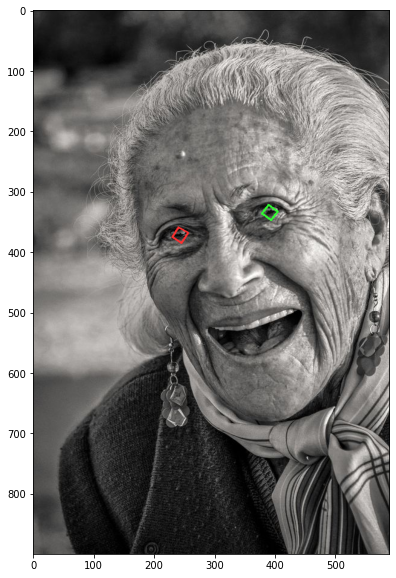

In [134]:
annotated_image = image.copy()
mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=first_face_landmarks,
          connections=mp_facemesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
plt.figure(figsize = (10,10))
plt.imshow(annotated_image[:,:,::-1])
plt.show()

Eye visualization together with an eyebrow

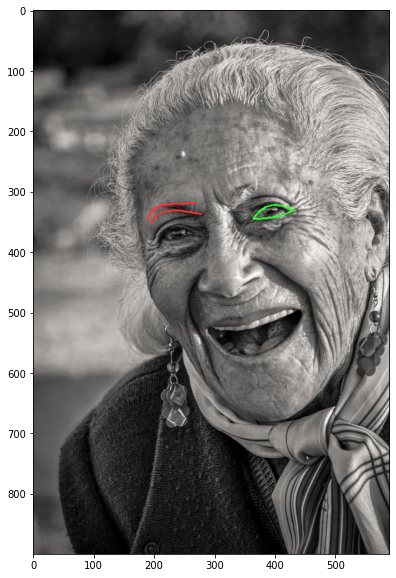

In [135]:
annotated_image = image.copy()
mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=first_face_landmarks,
          connections=mp_facemesh.FACEMESH_LEFT_EYE.union(mp_facemesh.FACEMESH_RIGHT_EYEBROW),
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

plt.figure(figsize = (10,10))
plt.imshow(annotated_image[:,:,::-1])
plt.show()

Face contours with other landmarks as points

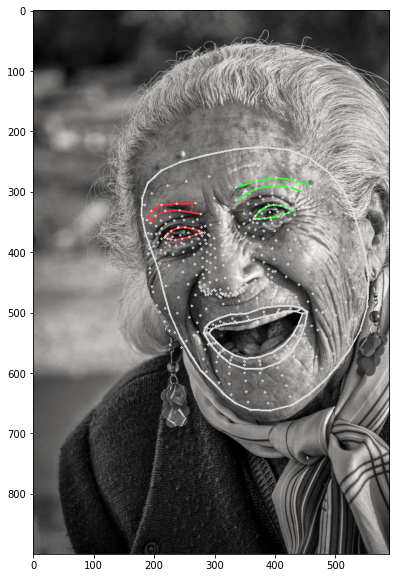

In [136]:
annotated_image = image.copy()
mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=first_face_landmarks,
          connections=mp_facemesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

plt.figure(figsize = (10,10))
plt.imshow(annotated_image[:,:,::-1])
plt.show()

All face landmarks and connections together

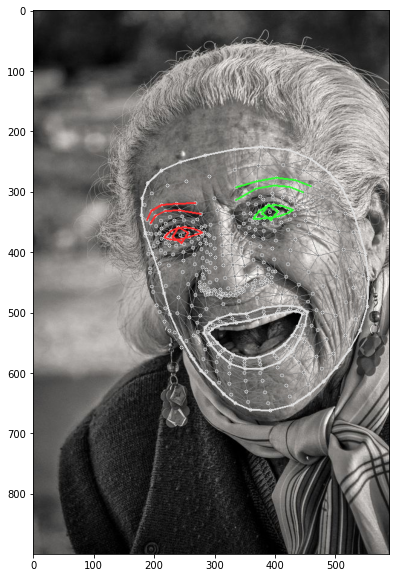

In [137]:
annotated_image = image.copy()
mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=first_face_landmarks,
          connections=mp_facemesh.FACEMESH_TESSELATION,
          landmark_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style(),
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=first_face_landmarks,
          connections=mp_facemesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=first_face_landmarks,
          connections=mp_facemesh.FACEMESH_IRISES,
          landmark_drawing_spec=None,
          connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_iris_connections_style())
plt.figure(figsize = (10,10))
plt.imshow(annotated_image[:,:,::-1])
plt.show()

Finally, we have 3D model of face:

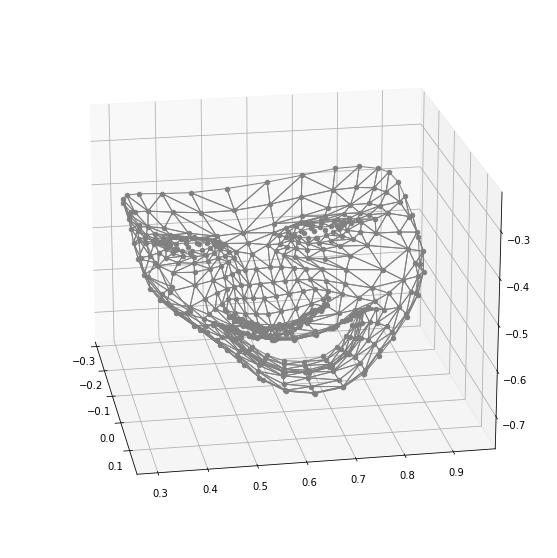

In [138]:
mp_drawing.plot_landmarks(landmark_list=first_face_landmarks,
                          connections=mp_facemesh.FACEMESH_TESSELATION,
                          landmark_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style(),
                          connection_drawing_spec = mp_drawing_styles.get_default_face_mesh_tesselation_style(),
                          elevation = 20,
                          azimuth = -10)

## Hands points
Keypoints for hands

![https://google.github.io/mediapipe/solutions/hands.html](hand_landmarks.png "Hand Landmarks")

In [139]:
file_name = IMAGE_FILES[9] #8, 9
with mp_hands.Hands(static_image_mode=True,
                    max_num_hands=2,
                    model_complexity=1,
                    min_detection_confidence=0.25,
                    min_tracking_confidence=0.5) as hands:
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file_name), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [140]:
if not results.multi_hand_landmarks:
      print("Hands landmarks have not been found.")
      plt.imshow(image[:,:,::-1])
      plt.show()
else:
    print("Number of detected hands:\n\t" + str(len(results.multi_hand_landmarks)))
    print('Handedness:', results.multi_handedness)
    first_hand_landmarks = results.multi_hand_landmarks[0].landmark
    second_hand_landmarks = results.multi_hand_landmarks[1].landmark

    print("Hand landmarks type:\n\t" + str(type(first_hand_landmarks)))
    print("First Hand Landmarks length:\n\t" + str(len(first_hand_landmarks)))
    print("Second Hand Landmarks length:\n\t" + str(len(second_hand_landmarks)))

    print("Some landmarks:\n" + str((first_hand_landmarks[:5])))

    landmark = first_hand_landmarks[mp_hands.HandLandmark.PINKY_MCP]
    print("Single landmark type:\n\t" + str(type(landmark)))
    print("Single landmark print:\n\t" + str(landmark))
    print("Landmark coordinates:" +
          "\n\tx = " + str(landmark.x) +
          "\n\ty = " + str(landmark.y) +
          "\n\tz = " + str(landmark.z))
    print("Landmark visibility :\n\t" + str(landmark.visibility))

Number of detected hands:
	2
Handedness: [classification {
  index: 1
  score: 0.9972844123840332
  label: "Right"
}
, classification {
  index: 0
  score: 0.9955412149429321
  label: "Left"
}
]
Hand landmarks type:
	<class 'google.protobuf.pyext._message.RepeatedCompositeContainer'>
First Hand Landmarks length:
	21
Second Hand Landmarks length:
	21
Some landmarks:
[x: 0.7890570163726807
y: 0.9024850130081177
z: 5.18505146374082e-07
, x: 0.7727084755897522
y: 0.7750082015991211
z: 0.030610349029302597
, x: 0.7181200385093689
y: 0.6764773726463318
z: 0.03590177744626999
, x: 0.6628380417823792
y: 0.6151310801506042
z: 0.034445784986019135
, x: 0.6163695454597473
y: 0.5883393287658691
z: 0.027114201337099075
]
Single landmark type:
	<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmark'>
Single landmark print:
	x: 0.649972140789032
y: 0.8135596513748169
z: -0.09923107177019119

Landmark coordinates:
	x = 0.649972140789032
	y = 0.8135596513748169
	z = -0.09923107177019119
La

We can check visibility for hand landmarks

In [141]:
for e in mp_hands.HandLandmark:
        print('Visibility for ' + e.name + ' ' + str(first_hand_landmarks[e].visibility))

Visibility for WRIST 0.0
Visibility for THUMB_CMC 0.0
Visibility for THUMB_MCP 0.0
Visibility for THUMB_IP 0.0
Visibility for THUMB_TIP 0.0
Visibility for INDEX_FINGER_MCP 0.0
Visibility for INDEX_FINGER_PIP 0.0
Visibility for INDEX_FINGER_DIP 0.0
Visibility for INDEX_FINGER_TIP 0.0
Visibility for MIDDLE_FINGER_MCP 0.0
Visibility for MIDDLE_FINGER_PIP 0.0
Visibility for MIDDLE_FINGER_DIP 0.0
Visibility for MIDDLE_FINGER_TIP 0.0
Visibility for RING_FINGER_MCP 0.0
Visibility for RING_FINGER_PIP 0.0
Visibility for RING_FINGER_DIP 0.0
Visibility for RING_FINGER_TIP 0.0
Visibility for PINKY_MCP 0.0
Visibility for PINKY_PIP 0.0
Visibility for PINKY_DIP 0.0
Visibility for PINKY_TIP 0.0


Similarly to face we can see landmarks and connections in the image

Index finger tip coordinates: ( 530.6286215782166, 236.05194634199142)
Index finger tip coordinates: ( 465.11268615722656, 232.38065099716187)


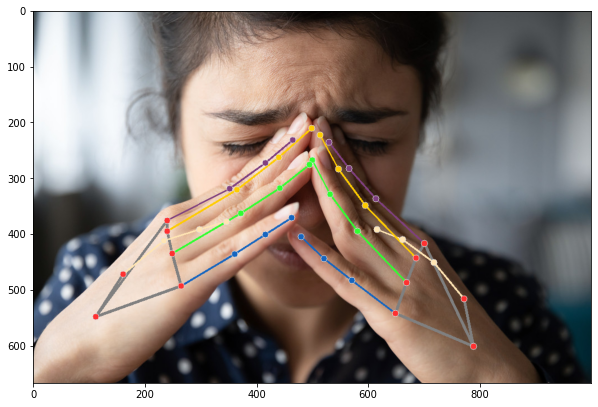

In [142]:
image_height, image_width, _ = image.shape
annotated_image = image.copy()
for hand_landmarks in results.multi_hand_landmarks:
    print(
        f'Index finger tip coordinates: (',
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
        f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
    )
    mp_drawing.draw_landmarks(
        annotated_image,
        hand_landmarks,
        mp_hands.HAND_CONNECTIONS,
        mp_drawing_styles.get_default_hand_landmarks_style(),
        mp_drawing_styles.get_default_hand_connections_style())
plt.figure(figsize = (10,10))
plt.imshow(annotated_image[:,:,::-1])
plt.show()

Finally, we can see hands keypoints with connections in 3D:

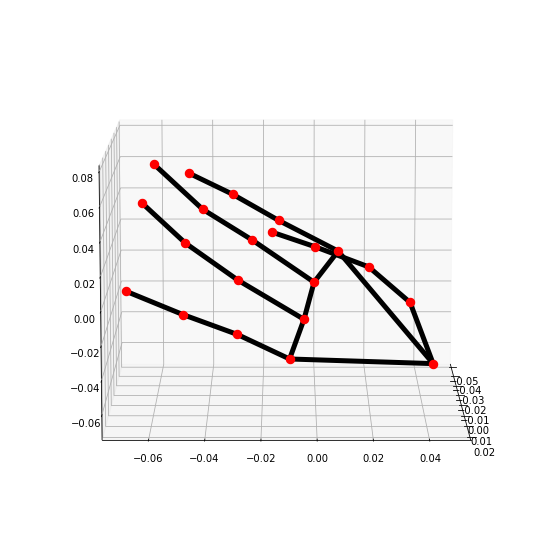

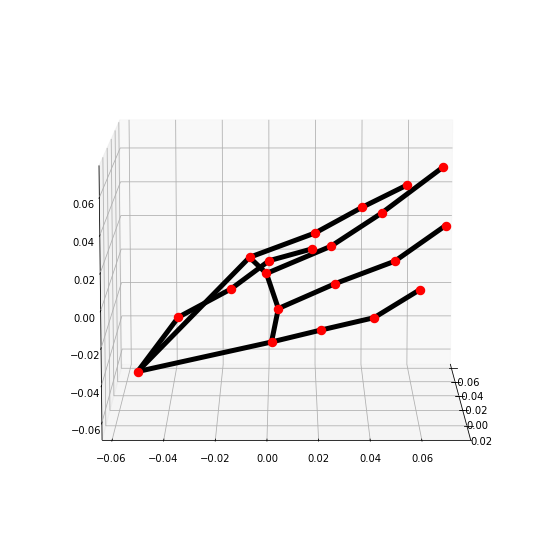

In [143]:
for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(hand_world_landmarks,
                                mp_hands.HAND_CONNECTIONS,
                                azimuth=0)